In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from validation_curve import validation_curve
import random_forest

### Training set

**Note: there is no test set because the validation curve relies on k-foldCV**

In [2]:
size =100

coefficients = [-1.4,2.1,-3,10.4,-8]
X = np.ones((size,len(coefficients)))
for i in range(0,len(coefficients)):
    X[:,i]=np.random.rand(size)
y = np.vectorize(lambda x: round(1/(1+math.exp(-x))))
y = y((X*coefficients).sum(axis=1) + np.random.normal(size=size))

### Estimator

In [3]:
forest = random_forest.RandomForest()

**Dictionary of arguments**
<br>
In this case, the number of trees will vary and no other parameters are needed

In [4]:
args = {'n_trees':range(2,20)}

### Validation curve

In [5]:
curve = validation_curve(forest,X,y,args,param_for_fit=False)

### Visualize

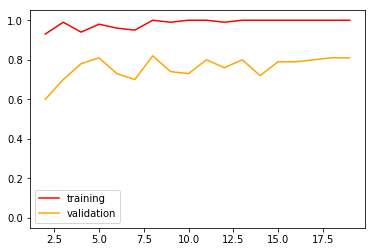

In [6]:
plt.plot(curve[:,0],curve[:,1],c='r',label='training')
plt.plot(curve[:,0],curve[:,2],c='orange',label='validation')
plt.ylim([-0.05,1.05])

plt.legend()
plt.show()

**It appears that with the random forest, the more trees the merrier** (at least up to 20)

### Options

**User can provide different estimators**

In [7]:
import decision_tree
tree = decision_tree.DecisionTree()
args = {'max_depth':[1,3,5,10]}
curve = validation_curve(tree,X,y,args,param_for_fit=False)

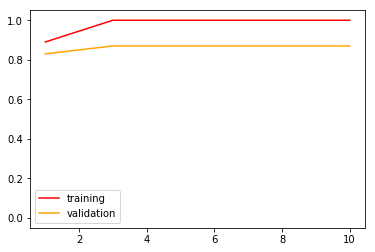

In [8]:
plt.plot(curve[:,0],curve[:,1],c='r',label='training')
plt.plot(curve[:,0],curve[:,2],c='orange',label='validation')
plt.ylim([-0.05,1.05])

plt.legend()
plt.show()

**Change the `k` for k-foldCV**

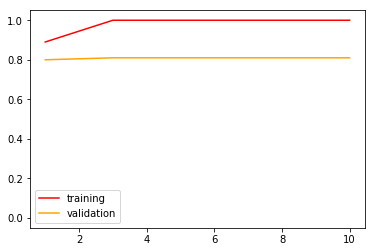

In [9]:
curve = validation_curve(tree,X,y,args,cv_k=10,param_for_fit=False)

plt.plot(curve[:,0],curve[:,1],c='r',label='training')
plt.plot(curve[:,0],curve[:,2],c='orange',label='validation')
plt.ylim([-0.05,1.05])

plt.legend()
plt.show()

 **And provide the dictionary either to `estimator.fit` or `estimator.__init__`**

In [10]:
args = {'max_depth':[2,3,5,10]}
curve = validation_curve(forest,X,y,args,param_for_fit=True)

Note: max_depth is an input for a tree's `__init__` but a forest's `fit` method

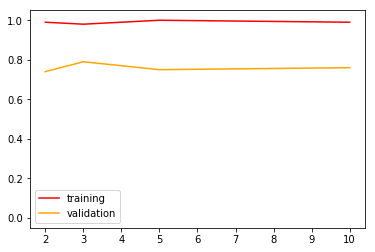

In [11]:
plt.plot(curve[:,0],curve[:,1],c='r',label='training')
plt.plot(curve[:,0],curve[:,2],c='orange',label='validation')
plt.ylim([-0.05,1.05])

plt.legend()
plt.show()